# Heart Disease Predictor

This notebook leverages various Python-based machine learning and data science libraries to build a machine learning model capable of classifying whether or not an individual has heart disease based on their medical data.<br>

## Problem Definition

As this project attempts to predict whether or not an individual has heart disease, it is foundationally a **binary classification** problem.<br>

In other words, given a patient's medical information, can we predict whether or not they have heart disease?

## Data

The original data for this project can be found from the [UCI Machine Learning Repository.](https://archive.ics.uci.edu/ml/datasets/heart+Disease)
It can also be found on [Kaggle.](https://www.kaggle.com/ronitf/heart-disease-uci)


## Features

The features that will be analysed to predict the target variable (heart disease or no heart disease) will be:

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Tools and Libraries

In this project, the following tools were used:
* pandas for data analysis
* NumPy for numerical operations
* Matplotlib for data visualization
* Scikit-Learn for modelling and evaluation

In [1]:
# Exploratory data analysis and plotting libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# Generate plots within notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from catboost import CatBoostClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Load Data

In [2]:
df = pd.read_csv('data/heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

In [4]:
## Exploratory Data Analysis

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Find number of each count
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Check for missing avalues
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency According to Sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


For this dataset, 75% of females and 45% of males have heart disease. As a baseline, solely looking at the sex feature, there is a 68% chance an individual may have heart disease.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

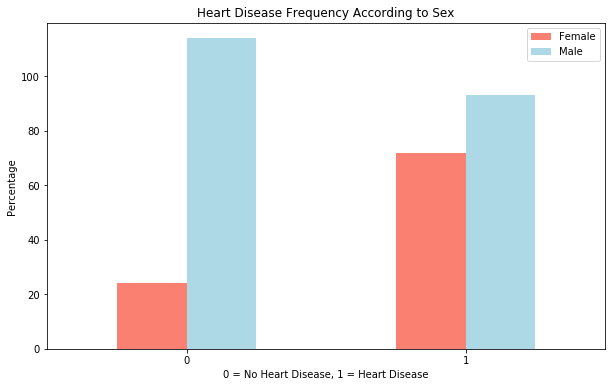

In [12]:
# Create a plot of above crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10, 6),
                                   color=['salmon', 'lightblue'])

plt.title('Heart Disease Frequency According to Sex')
plt.xlabel('0 = No Heart Disease, 1 = Heart Disease')
plt.ylabel('Percentage')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)

### Heart Disease Frequency According to Age vs. Cholesterol Levels

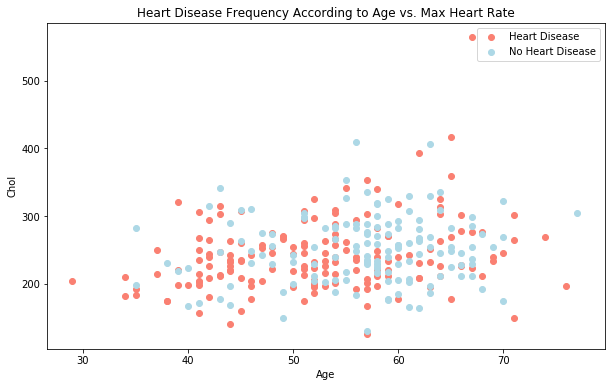

In [13]:
# Create figure
plt.figure(figsize=(10, 6))

# Create scatter plot with target=1
plt.scatter(df.age[df.target==1],
            df.chol[df.target==1],
            c='salmon')

# Create scatter plot with target=0
plt.scatter(df.age[df.target==0],
            df.chol[df.target==0],
            c='lightblue')

plt.title('Heart Disease Frequency According to Age vs. Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Chol')
plt.legend(['Heart Disease', 'No Heart Disease'])

### Heart Disease Frequency According to Age vs. Cholesterol

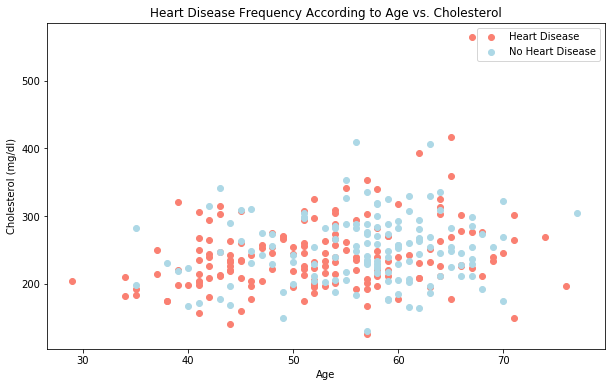

In [14]:
# Create figure
plt.figure(figsize=(10, 6))

# Create scatter plot with target=1
plt.scatter(df.age[df.target==1],
            df.chol[df.target==1],
            c='salmon')

# Create scatter plot with target=0
plt.scatter(df.age[df.target==0],
            df.chol[df.target==0],
            c='lightblue')

plt.title('Heart Disease Frequency According to Age vs. Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol (mg/dl)')
plt.legend(['Heart Disease', 'No Heart Disease'])

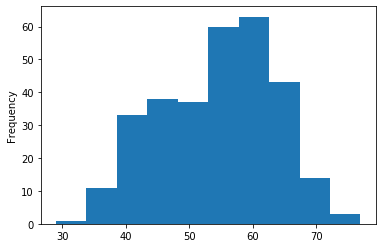

In [15]:
# Check distribution of age
df.age.plot.hist()

### Heart Disease Frequency According to Chest Pain Type

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

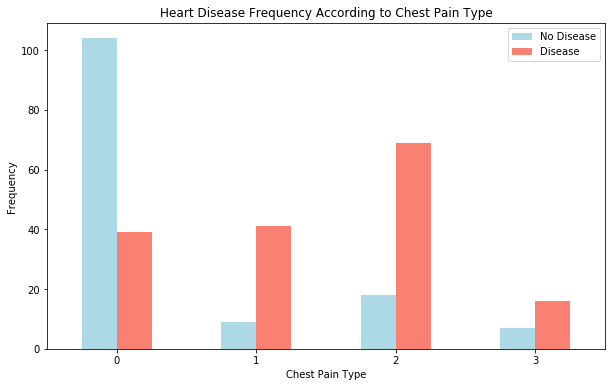

In [17]:
# Create a new plot of above crosstab
pd.crosstab(df.cp, df.target).plot(kind='bar', 
                                   figsize=(10,6), 
                                   color=['lightblue', 'salmon'])


plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation = 0)

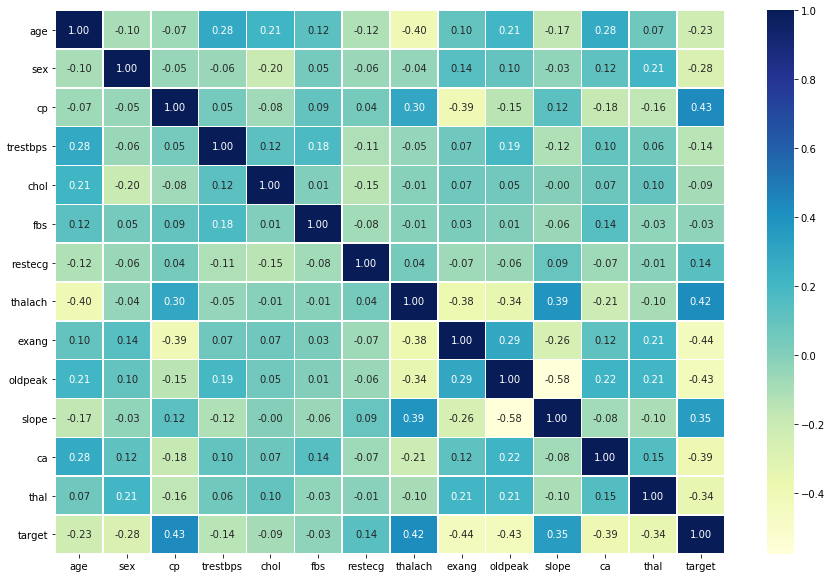

In [18]:
# Build correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap='YlGnBu');

It appears that target is the most positively correlated to the cp, thalach, and exang features.<br>
Additionally, the target is the most negatively correlated to the exang, oldpeak, and ca features.

## 5. Modelling 

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Split data to x and y
x = df.drop('target', axis=1)
y = df.target.values

In [21]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
np.random.seed(42)

# Split training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2) 

In [24]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [25]:
y_train, len(y_train)

(array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
       dtype=int64),
 242)

In [26]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [27]:
y_test, len(y_test)

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64),
 61)

### Potential models
According to the [Scikit-Learn algorithm cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), as well as various other sources from the internet, the models that will be experimented on for this classification problem are:
1. `LinearSVC`
2. `K-Nearest Neighbors`
3. `RandomForest` 
4. `Logistic Regression`
5. `CatBoost`

In [28]:
# Put models in dictionary
models = {'LinearSVC': svm.SVC(), 
          'KNN': KNeighborsClassifier(), 
          'Random Forest': RandomForestClassifier(),
          'Logistic Regression': LogisticRegression(),
          'CatBoost': CatBoostClassifier(),
         }

# Create function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    This function fits and evaluates machine learning models passed in as a parameter
    """
    np.random.seed(42)
    
    model_scores = {}
    
    # Iterate through models - fit them to the data and evaluate the model
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
        
    return model_scores

In [29]:
model_scores = fit_and_score(models, x_train, x_test, y_train, y_test)
model_scores

C:\Users\Tyler\Desktop\machine-learning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.005621
0:	learn: 0.6884219	total: 54.4ms	remaining: 54.3s
1:	learn: 0.6846992	total: 56.2ms	remaining: 28.1s
2:	learn: 0.6804482	total: 57.7ms	remaining: 19.2s
3:	learn: 0.6762280	total: 59.1ms	remaining: 14.7s
4:	learn: 0.6716854	total: 60.4ms	remaining: 12s
5:	learn: 0.6672902	total: 62.2ms	remaining: 10.3s
6:	learn: 0.6640072	total: 64.1ms	remaining: 9.09s
7:	learn: 0.6602127	total: 65.5ms	remaining: 8.12s
8:	learn: 0.6563948	total: 67.7ms	remaining: 7.46s
9:	learn: 0.6525316	total: 69.2ms	remaining: 6.85s
10:	learn: 0.6483925	total: 70.4ms	remaining: 6.33s
11:	learn: 0.6449119	total: 72.2ms	remaining: 5.95s
12:	learn: 0.6413090	total: 73.7ms	remaining: 5.6s
13:	learn: 0.6374641	total: 75.4ms	remaining: 5.31s
14:	learn: 0.6335822	total: 76.8ms	remaining: 5.04s
15:	learn: 0.6288496	total: 78.3ms	remaining: 4.82s
16:	learn: 0.6250951	total: 80.6ms	remaining: 4.66s
17:	learn: 0.6209988	total: 82.2ms	remaining: 4.48s
18:	learn: 0.6182407	total: 83.5ms	remaining: 4

163:	learn: 0.3550590	total: 312ms	remaining: 1.59s
164:	learn: 0.3539735	total: 313ms	remaining: 1.58s
165:	learn: 0.3526535	total: 314ms	remaining: 1.58s
166:	learn: 0.3519230	total: 316ms	remaining: 1.57s
167:	learn: 0.3507364	total: 317ms	remaining: 1.57s
168:	learn: 0.3495513	total: 319ms	remaining: 1.57s
169:	learn: 0.3486210	total: 321ms	remaining: 1.57s
170:	learn: 0.3478275	total: 323ms	remaining: 1.56s
171:	learn: 0.3464660	total: 324ms	remaining: 1.56s
172:	learn: 0.3455328	total: 326ms	remaining: 1.56s
173:	learn: 0.3446498	total: 327ms	remaining: 1.55s
174:	learn: 0.3434897	total: 329ms	remaining: 1.55s
175:	learn: 0.3430380	total: 330ms	remaining: 1.54s
176:	learn: 0.3423960	total: 332ms	remaining: 1.54s
177:	learn: 0.3422223	total: 333ms	remaining: 1.54s
178:	learn: 0.3414984	total: 336ms	remaining: 1.54s
179:	learn: 0.3401987	total: 338ms	remaining: 1.54s
180:	learn: 0.3397404	total: 339ms	remaining: 1.53s
181:	learn: 0.3389218	total: 341ms	remaining: 1.53s
182:	learn: 

371:	learn: 0.2325790	total: 621ms	remaining: 1.05s
372:	learn: 0.2321144	total: 622ms	remaining: 1.04s
373:	learn: 0.2316463	total: 623ms	remaining: 1.04s
374:	learn: 0.2312880	total: 625ms	remaining: 1.04s
375:	learn: 0.2309978	total: 626ms	remaining: 1.04s
376:	learn: 0.2305797	total: 627ms	remaining: 1.04s
377:	learn: 0.2302671	total: 628ms	remaining: 1.03s
378:	learn: 0.2298799	total: 629ms	remaining: 1.03s
379:	learn: 0.2295009	total: 631ms	remaining: 1.03s
380:	learn: 0.2289493	total: 632ms	remaining: 1.03s
381:	learn: 0.2285010	total: 633ms	remaining: 1.02s
382:	learn: 0.2283052	total: 635ms	remaining: 1.02s
383:	learn: 0.2280532	total: 636ms	remaining: 1.02s
384:	learn: 0.2278749	total: 637ms	remaining: 1.02s
385:	learn: 0.2276692	total: 638ms	remaining: 1.01s
386:	learn: 0.2273141	total: 640ms	remaining: 1.01s
387:	learn: 0.2269729	total: 641ms	remaining: 1.01s
388:	learn: 0.2265096	total: 643ms	remaining: 1.01s
389:	learn: 0.2261179	total: 644ms	remaining: 1.01s
390:	learn: 

600:	learn: 0.1691730	total: 942ms	remaining: 625ms
601:	learn: 0.1689899	total: 943ms	remaining: 624ms
602:	learn: 0.1686613	total: 945ms	remaining: 622ms
603:	learn: 0.1684002	total: 946ms	remaining: 620ms
604:	learn: 0.1682152	total: 947ms	remaining: 618ms
605:	learn: 0.1680343	total: 948ms	remaining: 617ms
606:	learn: 0.1677642	total: 950ms	remaining: 615ms
607:	learn: 0.1676470	total: 951ms	remaining: 613ms
608:	learn: 0.1675305	total: 952ms	remaining: 612ms
609:	learn: 0.1671817	total: 954ms	remaining: 610ms
610:	learn: 0.1671398	total: 955ms	remaining: 608ms
611:	learn: 0.1670068	total: 956ms	remaining: 606ms
612:	learn: 0.1668815	total: 958ms	remaining: 605ms
613:	learn: 0.1666197	total: 959ms	remaining: 603ms
614:	learn: 0.1663885	total: 960ms	remaining: 601ms
615:	learn: 0.1661393	total: 961ms	remaining: 599ms
616:	learn: 0.1659556	total: 963ms	remaining: 598ms
617:	learn: 0.1658758	total: 964ms	remaining: 596ms
618:	learn: 0.1657383	total: 965ms	remaining: 594ms
619:	learn: 

842:	learn: 0.1263748	total: 1.26s	remaining: 235ms
843:	learn: 0.1262461	total: 1.26s	remaining: 233ms
844:	learn: 0.1260461	total: 1.26s	remaining: 231ms
845:	learn: 0.1258716	total: 1.26s	remaining: 230ms
846:	learn: 0.1257180	total: 1.26s	remaining: 228ms
847:	learn: 0.1254682	total: 1.26s	remaining: 227ms
848:	learn: 0.1253213	total: 1.27s	remaining: 225ms
849:	learn: 0.1251052	total: 1.27s	remaining: 224ms
850:	learn: 0.1249508	total: 1.27s	remaining: 223ms
851:	learn: 0.1247602	total: 1.27s	remaining: 221ms
852:	learn: 0.1246495	total: 1.27s	remaining: 220ms
853:	learn: 0.1245380	total: 1.27s	remaining: 218ms
854:	learn: 0.1242942	total: 1.28s	remaining: 217ms
855:	learn: 0.1242096	total: 1.28s	remaining: 215ms
856:	learn: 0.1240640	total: 1.28s	remaining: 213ms
857:	learn: 0.1238950	total: 1.28s	remaining: 212ms
858:	learn: 0.1237673	total: 1.28s	remaining: 210ms
859:	learn: 0.1236049	total: 1.28s	remaining: 209ms
860:	learn: 0.1234278	total: 1.28s	remaining: 207ms
861:	learn: 

{'LinearSVC': 0.7049180327868853,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'Logistic Regression': 0.8852459016393442,
 'CatBoost': 0.8360655737704918}

### Model Comparison

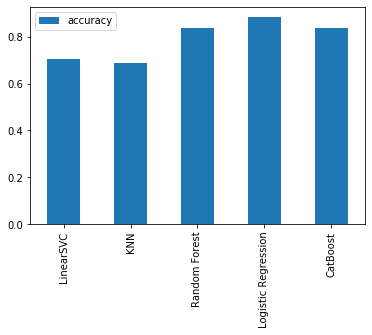

In [30]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

It is now clear numerically and visually that the base Logistic Regression model is the most accurate model tested

## Hyperparameter Tuning and Cross-Validation
As this data set is relatively small, cross-validation will be used as opposed to creating a validation set.

### Manual Tuning
The model below was manually tuned.

In [31]:
np.random.seed(42)
# Score model after being refitted with best parameters
cb = CatBoostClassifier(depth=1, learning_rate=0.4, iterations=18)
cb.fit(x_train, y_train)
cb.score(x_test, y_test)

0:	learn: 0.6269279	total: 530us	remaining: 9.02ms
1:	learn: 0.5703643	total: 924us	remaining: 7.4ms
2:	learn: 0.5176107	total: 1.34ms	remaining: 6.69ms
3:	learn: 0.4948025	total: 1.71ms	remaining: 5.99ms
4:	learn: 0.4654465	total: 2.1ms	remaining: 5.46ms
5:	learn: 0.4414038	total: 2.49ms	remaining: 4.98ms
6:	learn: 0.4284521	total: 2.86ms	remaining: 4.5ms
7:	learn: 0.4188544	total: 3.25ms	remaining: 4.06ms
8:	learn: 0.4072071	total: 3.63ms	remaining: 3.63ms
9:	learn: 0.3929328	total: 4.06ms	remaining: 3.25ms
10:	learn: 0.3845510	total: 4.43ms	remaining: 2.82ms
11:	learn: 0.3801280	total: 4.8ms	remaining: 2.4ms
12:	learn: 0.3735994	total: 5.18ms	remaining: 1.99ms
13:	learn: 0.3658657	total: 5.57ms	remaining: 1.59ms
14:	learn: 0.3600211	total: 5.96ms	remaining: 1.19ms
15:	learn: 0.3556379	total: 6.44ms	remaining: 804us
16:	learn: 0.3549254	total: 7.12ms	remaining: 418us
17:	learn: 0.3510596	total: 7.5ms	remaining: 0us


0.8852459016393442

### Tuning with `RandomSearchCV`

In [32]:
# Different LinearSVC hyperparameters
svc_grid = {'C': np.arange(1, 10, 1)}

# Different KNN hyperparameters
knn_grid = {'n_neighbors': np.arange(1, 21, 1)}

# Different LogisticRegression hyperparameters
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear'],
                'penalty' : ['l1', 'l2']}

# Different RandomForestClassifier hyperparameters
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

#### LinearSVC

In [33]:
np.random.seed(42)

# Setup random hyperparameter search for LinearSVC
rs_svc = RandomizedSearchCV(svm.SVC(),
                                param_distributions=svc_grid,
                                cv=5,
                                n_iter=9,
                                verbose=True)

# Fit random hyperparameter search model
rs_svc.fit(x_train, y_train);

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.2s finished


In [34]:
rs_svc.best_params_

{'C': 2}

In [35]:
rs_svc.score(x_test, y_test)

0.7049180327868853

#### KNN

In [36]:
np.random.seed(42)

# Setup random hyperparameter search for KNN
rs_knn = RandomizedSearchCV(KNeighborsClassifier(),
                                param_distributions=knn_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_knn.fit(x_train, y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


In [37]:
rs_knn.best_params_

{'n_neighbors': 3}

In [38]:
rs_knn.score(x_test, y_test)

0.6557377049180327

#### Logistic Regression

In [39]:
np.random.seed(42)

# Setup random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=40,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(x_train, y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.0s finished


In [40]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.23357214690901212}

In [41]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

#### Random Forest

In [42]:
np.random.seed(42)

# Setup random hyperparameter search for Random Forest
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                        n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(x_train, y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


In [43]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [44]:
rs_rf.score(x_test, y_test)

0.8688524590163934

As the both the CatBoost and Logistic Regression model were the most accurate after hyperparameter tuning, let's try tuning it further with `GridSearchCV`.

### Tuning with `GridSearchCV`

#### CatBoost

In [45]:
# Different CatBoost hyperparameters
cb_grid = {'iterations': np.arange(17, 20, 1),
           'learning_rate': np.arange(0.3, 0.5, 0.01),
           'depth': np.arange(1, 2, 0.025)}

cb = CatBoostClassifier()

gs_cb = cb.grid_search(param_grid=cb_grid,
                       X=x_train,
                       y=y_train,
                       cv=5,
                       shuffle=True,
                       refit=True,
                       verbose=True)

cb.score(x_test, y_test)

0:	loss: 0.4195441	best: 0.4195441 (0)	total: 29.3ms	remaining: 1m 10s
1:	loss: 0.4314252	best: 0.4195441 (0)	total: 42.1ms	remaining: 50.5s
2:	loss: 0.4293381	best: 0.4195441 (0)	total: 55ms	remaining: 43.9s
3:	loss: 0.4311213	best: 0.4195441 (0)	total: 67.4ms	remaining: 40.4s
4:	loss: 0.4199943	best: 0.4195441 (0)	total: 81.5ms	remaining: 39s
5:	loss: 0.4136966	best: 0.4136966 (5)	total: 94.1ms	remaining: 37.6s
6:	loss: 0.4413375	best: 0.4136966 (5)	total: 107ms	remaining: 36.5s
7:	loss: 0.4174065	best: 0.4136966 (5)	total: 119ms	remaining: 35.7s
8:	loss: 0.3924123	best: 0.3924123 (8)	total: 132ms	remaining: 35.1s
9:	loss: 0.4424598	best: 0.3924123 (8)	total: 151ms	remaining: 36.1s
10:	loss: 0.4123689	best: 0.3924123 (8)	total: 168ms	remaining: 36.4s
11:	loss: 0.3974229	best: 0.3924123 (8)	total: 180ms	remaining: 35.9s
12:	loss: 0.4369006	best: 0.3924123 (8)	total: 193ms	remaining: 35.5s
13:	loss: 0.4569082	best: 0.3924123 (8)	total: 206ms	remaining: 35.1s
14:	loss: 0.4616847	best: 0

0.8852459016393442

#### Logistic Regression

In [46]:
# Different Logistic Regression hyperparameters
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear'],
                'penalty' : ['l1', 'l2'],
                'C': np.logspace(-4, 4, 20)}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished


In [47]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'penalty': 'l2', 'solver': 'liblinear'}

In [48]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In [49]:
rf_grid = {'n_estimators': np.arange(100, 300, 50),
           'max_depth': [3, 5],
           'min_samples_split': np.arange(3, 6, 1),
           'min_samples_leaf': np.arange(18, 21, 1)}

# Setup grid hyperparameter search for Random Forest
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid=rf_grid,
                     cv=5,
                     verbose=True)

gs_rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [50]:
gs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 20,
 'min_samples_split': 5,
 'n_estimators': 150}

In [51]:
gs_rf.score(x_test, y_test)

0.8688524590163934

It is clear that after hyperparameter tuning, both the Catboost and Logistic Regression model scored the best with over 88.5% accuracy.

## Evaluating a classification model beyond accuracy

Although the accuracy has been evaluated, the metrics and visualizations below also play a role in determining the effectiveness of the model\:
* ROC curve and AUC score 
* Confusion matrix 
* Classification report 
* Precision 
* Recall 
* F1-score

In [52]:
# Make predictions on test data
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [53]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

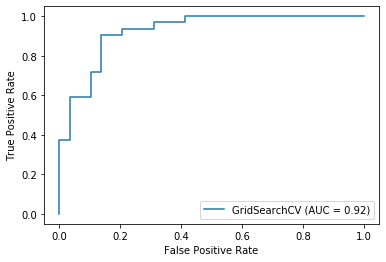

In [54]:
# Plot ROC curve and calculate AUC
plot_roc_curve(gs_log_reg, x_test, y_test)

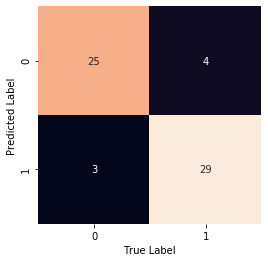

In [55]:
# Create confusion matrix
def plot_conf_mat(y_test, y_preds):
    """
    This function plots a confusion matrix
    """
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(y_test, y_preds)

In [56]:
# Generate classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

In [57]:
# Recreate Logistic Regression model with best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'penalty': 'l2', 'solver': 'liblinear'}

In [58]:
clf = LogisticRegression(C=0.23357214690901212,
                         solver='liblinear',
                         penalty='l2')
def cv_score(clf, x, y, cv, metric):
    """
    This function provides an averaged cross-validated score for the metric passed in
    """
    score = np.mean(cross_val_score(clf,
                         x,
                         y,
                         cv=cv, 
                         scoring=metric))
    return score

In [59]:
# Cross-validated scores
cv_score(clf, x, y, 5, 'accuracy')

cv_metrics = pd.DataFrame({'Accuracy': cv_score(clf, x, y, 5, 'accuracy'),
                            'Precision': cv_score(clf, x, y, 5, 'precision'),
                            'Recall': cv_score(clf, x, y, 5, 'recall'),
                            'f1': cv_score(clf, x, y, 5, 'f1')},
                            index=[0])
cv_metrics

,Accuracy,Precision,Recall,f1
0,0.847978,0.821587,0.927273,0.87054


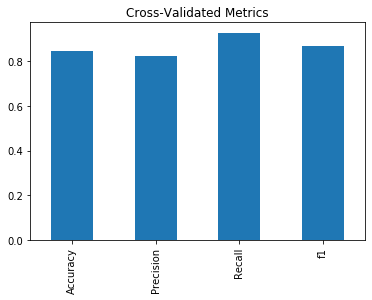

In [60]:
# Plot metrics
cv_metrics.T.plot.bar(title='Cross-Validated Metrics', legend=False)

## Feature Importance

In [61]:
# Fit an instance of Logistic Regression
clf.fit(x_train, y_train);

In [62]:
# Check coef_
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

In [63]:
# Match features to columns
features = dict(zip(df.columns, list(clf.coef_[0])))
features

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

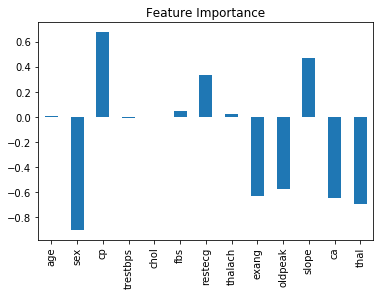

In [65]:
# Graph feature importance
features_df = pd.DataFrame(features, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

It is strange to see chol (cholesterol level) plays a minimal role in determining whether or not an individual has heart disease. Furthermore, although sex being highly negatively correlated is unorthodox, it simply indicates that females are more likely to suffer from heart disease in this dataset due to the nature of the sample size.